In [334]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [365]:
NHL_1 = pd.read_csv('NHLModel.csv')
NHL_2 = NHL_1[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'Injury Status']]
# NHL.columns 
NHL = NHL_2.dropna()
NHL.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status
0,LW,"6'2""",214,Abdelkader Justin,32,Injured
1,LW,"5'11""",196,Aberg Pontus,25,Injured
2,RW,"5'9""",171,Abramov Vitaly,21,Not Injured
3,C,"5'10""",205,Acciari Noel,27,Not Injured
4,LW,"6'0""",199,Agostino Kenny,27,Not Injured


In [350]:
# 1 = injured
# 0 = not injured
Encoded_df = pd.get_dummies(NHL, columns=['Injury Status'])[['POSITION', 'HEIGHT', 'WEIGHT', 'PLAYER', 'AGE', 'Injury Status_Injured']]
Encoded_df.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status_Injured
0,LW,74.0,214,Abdelkader Justin,32,1
1,LW,71.0,196,Aberg Pontus,25,1
2,RW,69.0,171,Abramov Vitaly,21,0
3,C,70.0,205,Acciari Noel,27,0
4,LW,72.0,199,Agostino Kenny,27,0


In [351]:
y = Encoded_df['Injury Status_Injured'].values.reshape(-1, 1)

In [352]:
Encoded_df.head()

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status_Injured
0,LW,74.0,214,Abdelkader Justin,32,1
1,LW,71.0,196,Aberg Pontus,25,1
2,RW,69.0,171,Abramov Vitaly,21,0
3,C,70.0,205,Acciari Noel,27,0
4,LW,72.0,199,Agostino Kenny,27,0


In [353]:
from sklearn.model_selection import train_test_split

# X = pd.get_dummies(NHL, columns=['POSITION','Injury Status'])

X = pd.get_dummies(Encoded_df[['POSITION', 'HEIGHT', 'WEIGHT', 'AGE']], columns=['POSITION'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=350, stratify=y)

X_train.head()



,HEIGHT,WEIGHT,AGE,POSITION_C,POSITION_D,POSITION_G,POSITION_LW,POSITION_RW
1300,72.0,197,23,0,0,0,1,0
1202,76.0,219,27,0,0,0,0,1
1055,73.0,221,25,0,1,0,0,0
1305,69.0,186,25,1,0,0,0,0
217,74.0,205,29,0,1,0,0,0


In [354]:
import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier


In [355]:
#Make random forest object
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [356]:
## Here we train the model
#clf.fit(X_train.iloc[:, : 8], y_train.ravel())
clf.fit(X_train, y_train.ravel())


/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [357]:
#SHOW THE TEST DATA
X_test.head()

,HEIGHT,WEIGHT,AGE,POSITION_C,POSITION_D,POSITION_G,POSITION_LW,POSITION_RW
1353,74.0,185,34,1,0,0,0,0
890,73.0,209,31,0,0,1,0,0
769,74.0,207,30,0,0,0,1,0
235,73.0,202,42,1,0,0,0,0
10,75.0,219,30,0,1,0,0,0


In [358]:
# Predict injury or no injury using clf model
#Here we run on the test set
preds=clf.predict(X_test)
print(len(preds))


340


In [359]:
#Print summary information from running prediction on X_test set
newdf=X_test
newdf['predicted']=preds
#print(newdf['predicted'].value_counts)
#newdf.index
#newdf.head()
odf=Encoded_df.loc[newdf.index]
odf['predicted']=preds
print("Predicted as injured:")
print(newdf.loc[newdf.predicted==1].shape)
print("Predicted as not injured")
print(newdf.loc[newdf.predicted==0].shape)


Predicted as injured:
(84, 9)
Predicted as not injured
(256, 9)


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [360]:
#Show original data with labels and predictions 
odf.head(50)

,POSITION,HEIGHT,WEIGHT,PLAYER,AGE,Injury Status_Injured,predicted
1353,C,74.0,185,Zajac Travis,34,1,1
890,G,73.0,209,Neuvirth Michal,31,1,0
769,LW,74.0,207,Malone Brad,30,0,1
235,C,73.0,202,Cullen Matt,42,1,1
10,D,75.0,219,Alzner Karl,30,0,1
177,C,73.0,200,Cave Colby,24,0,1
1227,D,74.0,197,Tanev Christopher,29,0,1
1066,G,74.0,169,Robson Matt,23,0,0
125,D,74.0,205,Braun Justin,32,1,1
584,D,76.0,225,Johns Stephen,27,1,0


In [361]:
# NHL.to_csv('NHLModel.csv', index=True, header=True)


In [367]:
# clf.score(X_test, y_test)

In [363]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [364]:
classifier.fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [161]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6647058823529411
Testing Data Score: 0.6794117647058824


In [151]:
# # Generate a new data point (the red circle)
# import numpy as np
# new_data = np.array([[-2, 6]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [164]:
# library & dataset
import seaborn as sns
df = Encoded_df
import matplotlib.pyplot as plt
 


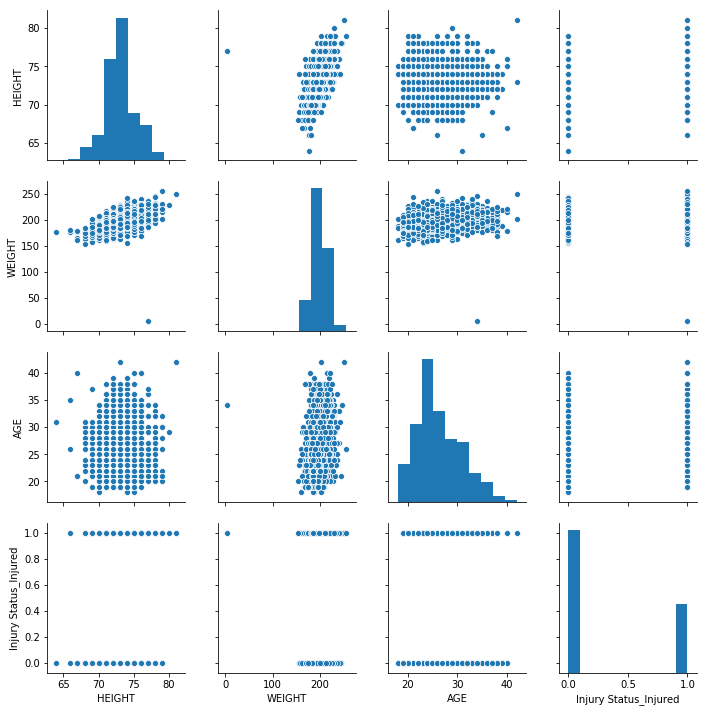

In [166]:
# Basic correlogram
sns.pairplot(df)
plt.show()


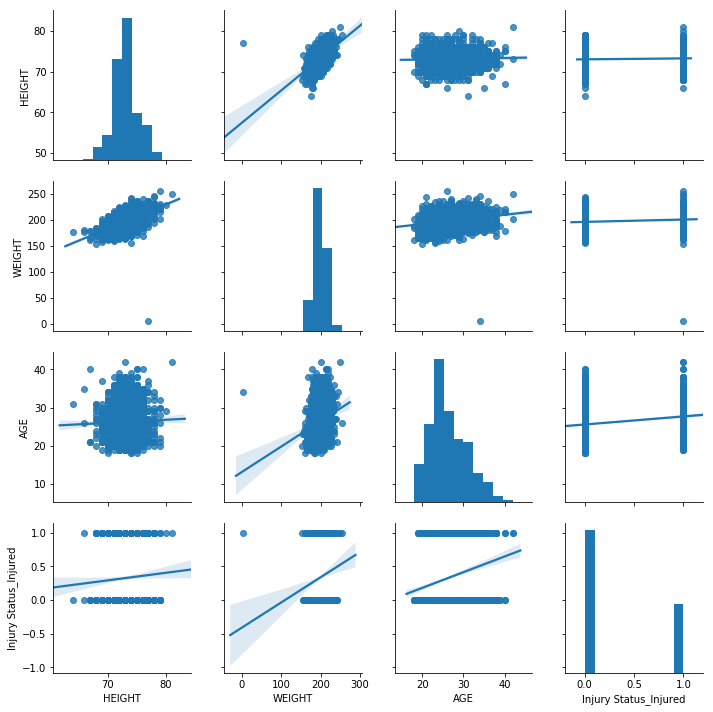

In [169]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = Encoded_df
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# # without regression
# sns.pairplot(df, kind="scatter")
# plt.show()


In [187]:
sns.kdeplot(NHL.AGE)

AttributeError: 'str' object has no attribute 'AGE'

In [274]:

##NOT RUN
def runOptimizeRFparams():
    np.random.seed(42)
    start = time.time()

    param_dist = {'max_depth': [2, 3, 4],
                  'bootstrap': [True, False],
                  'max_features': ['auto', 'sqrt', 'log2', None],
                  'criterion': ['gini', 'entropy']}

    cv_rf = GridSearchCV(clf, cv = 10,
                         param_grid=param_dist,
                         n_jobs = 3)

    cv_rf.fit(X_train, y_train.ravel())
    print('Best Parameters using grid search: \n',
          cv_rf.best_params_)
    end = time.time()
    print('Time taken in grid search: {0: .2f}'.format(end - start))
    
